In [1]:
#import a bunch of things

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [3]:
# from pathlib import Path
# text = Path("Datasets/wikitext.txt").read_text(encoding="utf-8")
# print(f"Total characters in wikitext.txt: {len(text):,}")
# from transformers import GPT2Tokenizer
# tokenizer = GPT2Tokenizer.from_pretrained("./gpt2_tokenizer")
# tokens = tokenizer(text)["input_ids"]
# print(f"Total GPT2 tokens: {len(tokens):,}")

In [2]:
#read in the data
data = pd.read_csv("experiment_results.csv")
irreducible_loss = 1.25
adam_results = data['Final Loss with Adam']
adamw_results = data['Final Loss with AdamW']
depths = data['Depth']
#subtract 1.511 from all the results
adam_results = adam_results-irreducible_loss
adamw_results = adamw_results-irreducible_loss
plt.scatter(depths, adam_results, label='Adam')
plt.scatter(depths, adamw_results, label='AdamW')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Depth')
plt.ylabel('Irreducible Loss')
plt.grid(True)
plt.legend()
plt.show()



#secon plot of loss differences
# loss_differences = adamw_results - adam_results
# plt.scatter(depths, loss_differences)
# plt.xscale('log')
# plt.grid(True)
# plt.show()

#plot the data
# plt.figure(figsize=(10, 6))
# sns.lineplot(x="depth", y="loss", data=data, hue="activation")
# plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'experiment_results.csv'

# Figure Out How to Convert to Compute Multiplier

In [3]:
#look at ratio 
ratios =np.log(adamw_results)-np.log(adam_results)
plt.scatter(depths, ratios)
plt.xscale('log')
plt.xlabel('Depth')
plt.ylabel('Ratio')
plt.grid(True)

NameError: name 'adamw_results' is not defined

# Analysis of Algorithmic Comparison Experiment Data

adam/sgd effect -0.32627937194992485 compute effect 8.207334503463057
rotary effect over sinusoidal -0.0976052070301745 compute effect 1.8770680527949888
transformer init vs xavier effect -0.004431573640841346 compute effect 1.0290034377207744
dropout effect/no-dropout effect -0.014684551682921043 compute effect 1.099371929016688
swiglu effect/gelu effect -0.034667441015038714 compute effect 1.250646865391505
adamw effect 1.0831131080435599


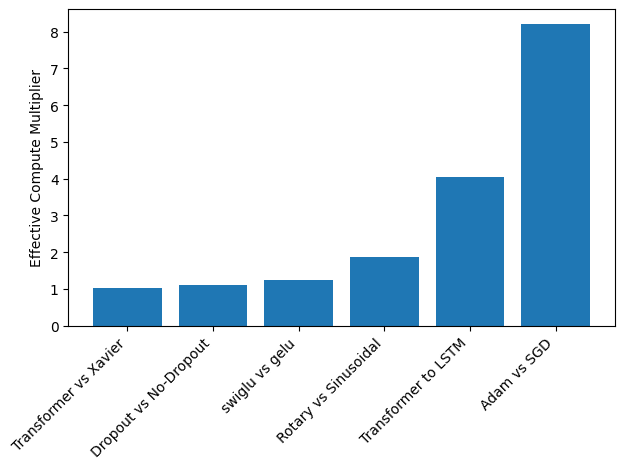

In [12]:
import numpy as np
import matplotlib.pyplot as plt
irreducible = 1.7
def compute_effect(loss_1, loss_2):
    irreducible = 1.7
    return np.exp(-(np.log(loss_1-irreducible)-np.log(loss_2-irreducible))/.155)
effect_adam = np.log(10.68-1.7) - np.log(8.18-1.7)
compute_effect_adam = np.exp(effect_adam/.155)
print("adam/sgd effect", -effect_adam, "compute effect", np.exp(effect_adam/.155))
effect_rotary = np.log(7.5585-1.7) - np.log(7.0137-1.7)
compute_effect_rotary = np.exp(effect_rotary/.155)
print("rotary effect over sinusoidal", -effect_rotary, "compute effect", compute_effect_rotary)
effect_init = np.log(7.58-1.7) - np.log(7.554-1.7)
compute_effect_init = np.exp(effect_init/.155)
print("transformer init vs xavier effect", -effect_init, "compute effect", compute_effect_init)
effect_dropout = np.log(7.5996-1.7) - np.log(7.5136-1.7)
compute_effect_dropout = np.exp(effect_dropout/.155)
print("dropout effect/no-dropout effect", -effect_dropout, "compute effect", compute_effect_dropout)
effect_swiglu_gelu = np.log(5.7131-1.7)-np.log(5.57636-1.7)
compute_effect_swiglu_gelu = np.exp(effect_swiglu_gelu/.155)
print("swiglu effect/gelu effect", -effect_swiglu_gelu, "compute effect", compute_effect_swiglu_gelu)

compute_effect_transformer_to_lstm = (1.7/1.2)*compute_effect(6.587, 7.4515)

compute_effect_adamw = np.exp((np.log(4.31-1.7) - np.log(4.2779-1.7))/.155)
print("adamw effect", compute_effect_adamw)



#sort the compute effects and graph 
labels = ['Adam vs SGD', 'Rotary vs Sinusoidal', 'Transformer vs Xavier', 'Dropout vs No-Dropout','Transformer to LSTM', 'swiglu vs gelu']
compute_effects = [compute_effect_adam, compute_effect_rotary, compute_effect_init, compute_effect_dropout, compute_effect_transformer_to_lstm, compute_effect_swiglu_gelu]

# Sort effects and corresponding labels
sorted_data = sorted(zip(compute_effects, labels))
sorted_effects, sorted_labels = zip(*sorted_data)

fig, ax = plt.subplots()
bars = ax.bar(range(len(sorted_effects)), sorted_effects)

# Set the x-tick positions and labels
ax.set_xticks(range(len(sorted_effects)))
ax.set_xticklabels(sorted_labels, rotation=45, ha='right')
plt.ylabel('Effective Compute Multiplier')
# plt.yscale('log')
plt.tight_layout()
plt.show()


In [7]:
diff = np.log(2.65-2.5)-np.log(2.55-2.5)
print("compute effect", np.exp(diff))

compute effect 3.0000000000000084


[2.2345613032350125, 2.429585946615238, 2.554830762867417, 2.702986191755334]
Power law fit: y = 2.0741 * x^0.1093


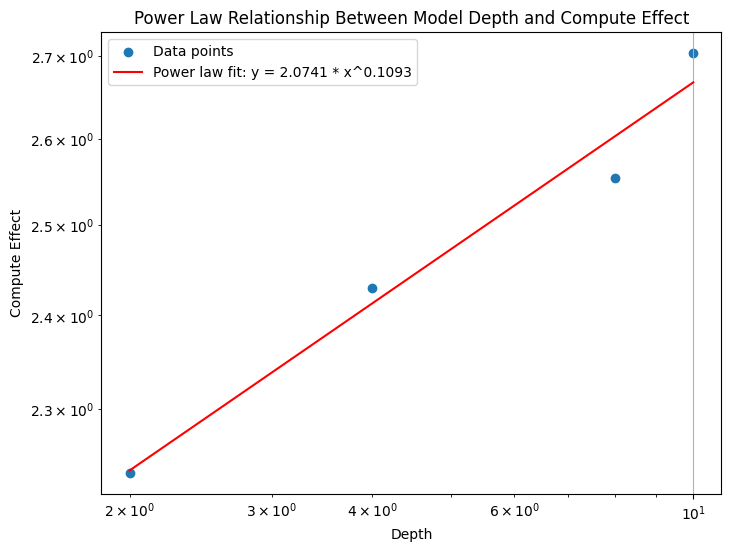

2.7139384876415877


In [6]:
def compute_effect(loss_1, loss_2):
    irreducible = 1.7
    return np.exp(-(np.log(loss_1-irreducible)-np.log(loss_2-irreducible))/.155)
# Calculate compute effects for different model depths
loss_adam = [8.1087, 8.0181, 7.9631, 7.9063]
loss_sgd = [8.9593, 8.9501, 8.9432, 8.9405]
loss_pairs = zip(loss_adam, loss_sgd)
compute_effects = [compute_effect(loss_1, loss_2) for loss_1, loss_2 in loss_pairs]
print(compute_effects)
depths = [2, 4, 8, 10]

# Fit power law (y = ax^b) by converting to log-log space and using linear regression
log_depths = np.log(depths)
log_effects = np.log(compute_effects)
slope, intercept = np.polyfit(log_depths, log_effects, 1)
power_law_exponent = slope
power_law_coefficient = np.exp(intercept)

# Print the power law parameters
print(f"Power law fit: y = {power_law_coefficient:.4f} * x^{power_law_exponent:.4f}")

# Plot the data points and the power law fit
plt.figure(figsize=(8, 6))
plt.scatter(depths, compute_effects, label='Data points')
plt.plot(depths, power_law_coefficient * np.array(depths)**power_law_exponent, 
         'r-', label=f'Power law fit: y = {power_law_coefficient:.4f} * x^{power_law_exponent:.4f}')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Depth')
plt.ylabel('Compute Effect')
plt.title('Power Law Relationship Between Model Depth and Compute Effect')
plt.legend()
plt.grid(True)
plt.show()


print((10**4)**0.1084)



In [9]:

# # glu:
# #   Final: 4.3721 ± 0.0027
# #   Best:  4.3721 ± 0.0027
# # gelu:
# #   Final: 4.4421 ± 0.0024
# #   Best:  4.4421 ± 0.0024
# # relu:
# #   Final: 4.3918 ± 0.0006
# #   Best:  4.3918 ± 0.0006
# # swiglu:
# #   Final: 4.3554 ± 0.0011
#   Best:  4.3554 ± 0.0011

print(2.15/2.09)
swiglu_effect = compute_effect(4.3554, 4.44)
print(swiglu_effect/(2.15/2.09))

1.0287081339712918
1.1900980447679061


In [10]:
# sinusoidal:
#   Final: 6.6211 ± 0.0178
#   Best:  6.6211 ± 0.0178
# learned:
#   Final: 5.7047 ± 0.0025
#   Best:  5.7047 ± 0.0025
# rotary:
#   Final: 5.6625 ± 0.0040
#   Best:  5.6625 ± 0.0040
#with half the data 

# sinusoidal:
#   Final: 4.6752 ± 0.0227
#   Best:  4.6752 ± 0.0227
# learned:
#   Final: 4.4719 ± 0.0006
#   Best:  4.4719 ± 0.0006
# rotary:
#   Final: 4.4454 ± 0.0045
#   Best:  4.4454 ± 0.0045
#full 10 epoch


# cosine:
#   Final: 4.5274 ± 0.0000
#   Best:  4.5274 ± 0.0000
# cosine_warmup:
#   Final: 4.5452 ± 0.0000
#   Best:  4.5452 ± 0.0000
# inverse_sqrt:
#   Final: 4.5840 ± 0.0000
#   Best:  4.5840 ± 0.0000
# one_cycle:
#   Final: nan ± nan
#   Best:  nan ± nan


# transformer_scaled:
#   Final: 4.5462 ± 0.0000
#   Best:  4.5462 ± 0.0000
# xavier_uniform:
#   Final: 4.5992 ± 0.0000
#   Best:  4.5992 ± 0.0000


# ̃η η             InvSqrt Constant Cosine Linear Cosine Linear
# 10× 10× D2Z D2Z
# 6.5e-02 8.1e-03 2.789 3.035 NaN 2.667 2.611 2.605
# 3.2e-02 4.0e-03 2.710 2.850 2.604 2.606 2.574 2.571
# 1.6e-02* 2.0e-03 2.671 2.768 2.590 2.591 2.578 2.573
# 8.1e-03 1.0e-03 2.665 2.722 2.598 2.600 2.595 2.590
# 4.0e-03 5.1e-04 2.691 2.711 2.634 2.635 2.637 2.633
# 2.0e-03 2.5e-04 2.762 2.739 2.707 2.710 2.717 2.714


rotary_effect = compute_effect(4.5462, 4.5992)
print(rotary_effect)





1.1264067301056533


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


1.5205048021508052 rotar effect 2 
1.504711896336399 rotar effect 4 
1.585067872233899 rotary effect 8
1.469318394754335 rotary effect 10


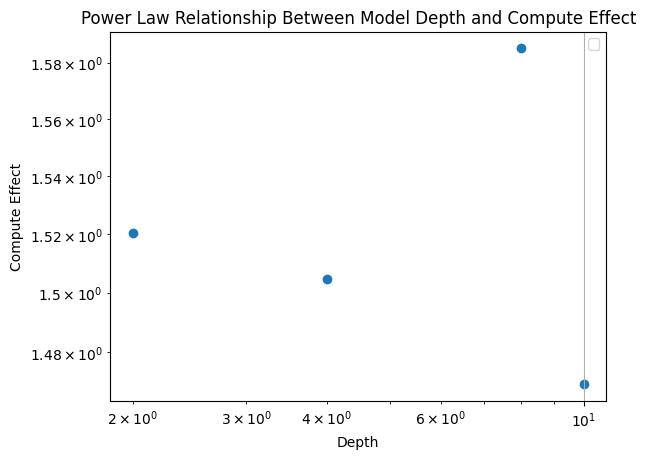

In [11]:
#after 5 epochs on 3*10**8 data
# 2:
#   Final: 4.6704 ± 0.0008
#   Best:  4.6704 ± 0.0008
# 4:
#   Final: 4.6021 ± 0.0008
#   Best:  4.6021 ± 0.0008
# 8:
#   Final: 4.5792 ± 0.0064
#   Best:  4.5792 ± 0.0064
# 10:
#   Final: 4.5342 ± 0.0077
#   Best:  4.5342 ± 0.0077


# #after 5 epochs on 10**8 data rope 
# 2:
#   Final: 4.6182 ± 0.0005
#   Best:  4.6182 ± 0.0005
# 4:
#   Final: 4.5680 ± 0.0029
#   Best:  4.5680 ± 0.0029
# 8:
#   Final: 4.5279 ± 0.0039
#   Best:  4.5279 ± 0.0039
# 10:
#   Final: 4.5270 ± 0.0035
#   Best:  4.5270 ± 0.0035


#after 5 epochs on 3*10**8 data
# Comparing different num_layers values:
# 2:
#   Final: 4.4836 ± 0.0017
#   Best:  4.4836 ± 0.0017
# 4:
#   Final: 4.4240 ± 0.0046
#   Best:  4.4240 ± 0.0046
# 8:
#   Final: 4.3808 ± 0.0038
#   Best:  4.3808 ± 0.0038
# 10:
#   Final: 4.3701 ± 0.0003
#   Best:  4.3701 ± 0.0003


rotary_effect_2 = compute_effect(4.4836, 4.6704)
rotary_effect_4 = compute_effect(4.4240,4.6021)
rotary_effect_8 = compute_effect(4.3808, 4.5792)
rotary_effect_10 = compute_effect(4.3701,4.5342)
print(rotary_effect_2, "rotar effect 2 ")
print(rotary_effect_4, "rotar effect 4 ")
print(rotary_effect_8, "rotary effect 8")
print(rotary_effect_10, "rotary effect 10")
compute_effects = [rotary_effect_2, rotary_effect_4, rotary_effect_8, rotary_effect_10]
depths = [2, 4, 8, 10]
plt.scatter(depths, compute_effects)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Depth')
plt.ylabel('Compute Effect')
plt.title('Power Law Relationship Between Model Depth and Compute Effect')
plt.legend()
plt.grid(True)
plt.show()


In [7]:
#estimating compute effect of Transformer to LSTM

print(compute_effect(6.56, 7.4466))


print("Estimated compute effect of Transformer to LSTM")
print((1.7/1.2)*compute_effect(6.587, 7.4515))

2.947909785713844
Estimated compute effect of Transformer to LSTM
4.051790054002364
